In [1]:
import pyreadstat
import pandas as pd

In [2]:
df = pd.read_parquet("PISA_2022_cleaned.parquet")

df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values if any conversion failed
df.dropna(inplace=True)

In [3]:
df.head()

,one-on-one,IKT,video,small_group,large_group,none,spol,letnik
481056,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0
481057,0.0,0.0,0.0,0.0,1.0,0.0,1.0,10.0
481058,0.0,0.0,0.0,0.0,0.0,1.0,2.0,10.0
481059,0.0,0.0,1.0,0.0,0.0,1.0,2.0,10.0
481060,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0


ANALIZA

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [5]:
columns_for_clustering = ["one-on-one", "IKT", "video", "small_group", "large_group", "none"]
X = df[columns_for_clustering]

c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

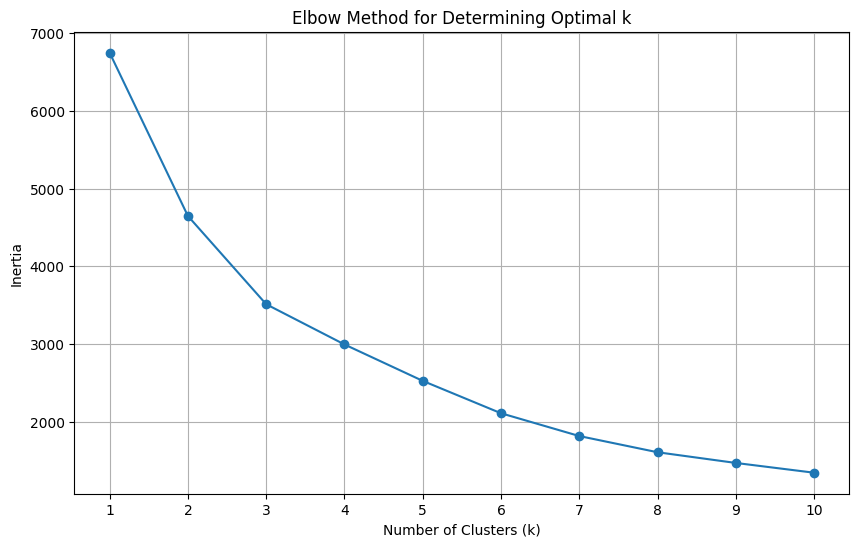

In [6]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Determining Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

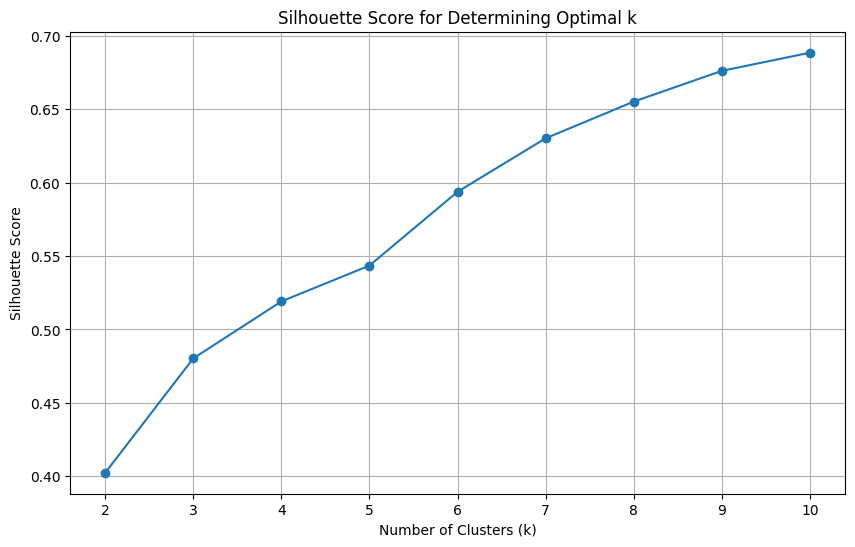

In [7]:
from sklearn.metrics import silhouette_score

# Silhouette scores
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Determining Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


In [8]:
X.head()

,one-on-one,IKT,video,small_group,large_group,none
481056,0.0,0.0,0.0,0.0,0.0,1.0
481057,0.0,0.0,0.0,0.0,1.0,0.0
481058,0.0,0.0,0.0,0.0,0.0,1.0
481059,0.0,0.0,1.0,0.0,0.0,1.0
481060,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(X)
clusters = kmeans.labels_

c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
X['Cluster'] = clusters

C:\Users\borbr\AppData\Local\Temp\ipykernel_6444\3002481503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = clusters


In [11]:
# Viewing the mean values of each cluster
cluster_means = X.groupby('Cluster').mean()
print(cluster_means)

         one-on-one       IKT     video  small_group  large_group      none
Cluster                                                                    
0          0.500000  0.569006  0.984211     0.408772     0.231579  0.205263
1          0.025621  0.024857  0.029828     0.041683     0.018356  1.000000
2          0.344335  0.162562  0.000000     0.258128     0.086700  0.000000


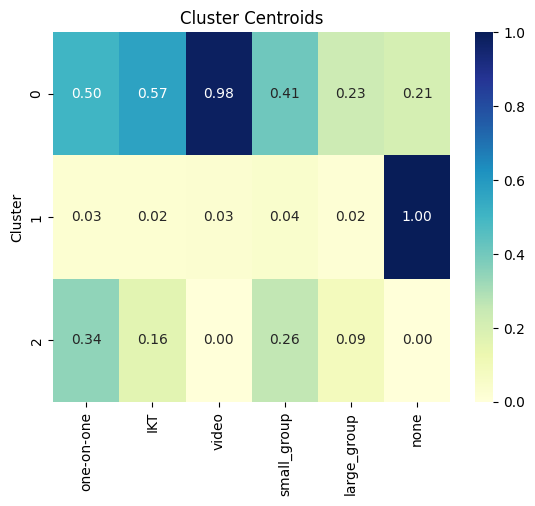

In [13]:
import seaborn as sns
# Heatmap of the cluster centroids
sns.heatmap(cluster_means, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Cluster Centroids')
plt.show()

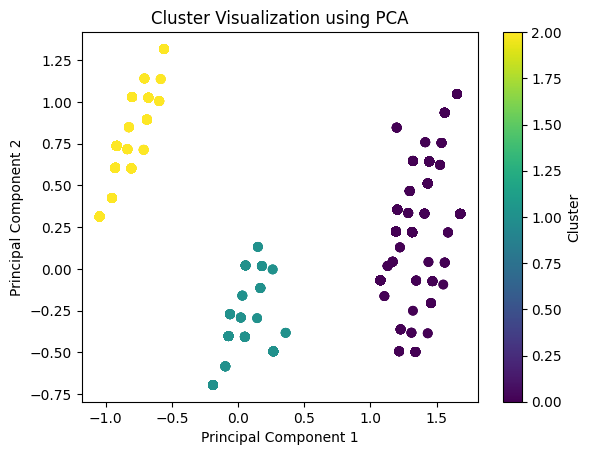

In [14]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.title('Cluster Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [15]:
# Define a new threshold for column prevalence
threshold = 0.3  # Example: lower the threshold to 0.3

# Iterate through each cluster
for cluster_label in X['Cluster'].unique():
    print("Cluster", cluster_label, "interpretation:")
    
    # Iterate through each column, excluding the 'Cluster' column
    for column in X.columns:
        if column != 'Cluster':
            column_mean = X[X['Cluster'] == cluster_label][column].mean()
            if column_mean > threshold:
                print(column, "is prevalent in this cluster.")
            else:
                print(column, "is not prevalent in this cluster.")
    print()

Cluster 1 interpretation:
one-on-one is not prevalent in this cluster.
IKT is not prevalent in this cluster.
video is not prevalent in this cluster.
small_group is not prevalent in this cluster.
large_group is not prevalent in this cluster.
none is prevalent in this cluster.

Cluster 2 interpretation:
one-on-one is prevalent in this cluster.
IKT is not prevalent in this cluster.
video is not prevalent in this cluster.
small_group is not prevalent in this cluster.
large_group is not prevalent in this cluster.
none is not prevalent in this cluster.

Cluster 0 interpretation:
one-on-one is prevalent in this cluster.
IKT is prevalent in this cluster.
video is prevalent in this cluster.
small_group is prevalent in this cluster.
large_group is not prevalent in this cluster.
none is not prevalent in this cluster.

